In [1]:
# import the necessary packages
import numpy as np
import argparse

#https://github.com/jrosebr1/imutils
import imutils

import cv2
from PIL import Image
import os 
import matplotlib.pyplot as plt

base_path = r"C:\Users\мiшель\Desktop\ObjectDetection\SeatsDetection"
image_path = os.path.join(base_path, 'temp_image.jpg')
image = np.array(Image.open(image_path))
plt.imshow(image)

In [2]:
lower = np.array([0, 0, 0])
upper = np.array([100, 100, 100])
shapeMask = cv2.inRange(image, lower, upper)
squares = []

I found 3198 black shapes


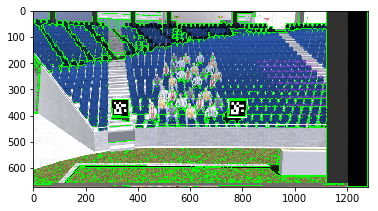

In [5]:
def angle_cos(p0, p1, p2):
    d1, d2 = (p0-p1).astype('float'), (p2-p1).astype('float')
    return abs( np.dot(d1, d2) / np.sqrt( np.dot(d1, d1)*np.dot(d2, d2) ) )


img = image.copy()
cnts = cv2.findContours(shapeMask.copy(), cv2.RETR_EXTERNAL,
cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
print("I found {} black shapes".format(len(cnts)))
cv2.imshow("Mask", shapeMask)
# loop over the contours
for cnt in cnts:
    # draw the contour and show it
    cv2.drawContours(img, [cnt], -1, (0, 255, 0), 2)
    
#     print(len(cnt))
    cnt_len = cv2.arcLength(cnt, True)
#     print('cnt len', cnt_len)
    cnt = cv2.approxPolyDP(cnt, 0.02*cnt_len, True)
        
#     print(len(cnt))
#     print(cv2.contourArea(cnt))
#     if cv2.contourArea(cnt) > 20:
#         print(len(cnt))
        
    if len(cnt) == 4 and cv2.contourArea(cnt) > 20 and cv2.isContourConvex(cnt):
        cnt = cnt.reshape(-1, 2)
        
#         max_cos = np.max([angle_cos( cnt[i], cnt[(i+1) % 4], cnt[(i+2) % 4] ) for i in range(4)])
#                     #print(cnt)
#         a = (cnt[1][1] - cnt[0][1])
        
#         if max_cos < 0.1 and a < image.shape[0]*0.8:
        squares.append(cnt)
    
plt.imshow(img)
# 	cv2.waitKey(0)

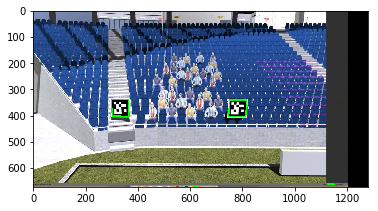

In [6]:
cv2.drawContours(image, squares, -1, (0, 255, 0), 3)
plt.imshow(image)

In [9]:
squares[0].shape

(4, 2)

IntSlider(value=3, max=5)

IntSlider(value=7, max=10, min=6)